# Python基础语法

> win + "idle" 打开idle，进行交互式编程
>
> 项目：
>
> 在idle中 Ctrl + n 创建空文件，（保存好文件后）F5运行
>
> 打印结果显示于idle
>
> 也可直接使用类似于VsCode的编辑器打开文件夹，创建 `.py`  文件直接编写，F5选择合适的编译器运行
>
> 打印结果显示于下方终端（如果没有可以 `Ctrl + ·` 打开）

## 打印

- sep：指定多个参数之间的分隔符，默认为一个空格。

- end：指定print()函数输出的结尾字符，默认为换行符"\n"。

- file：指定输出流，默认为sys.stdout，即控制台输出。

- flush：刷新输出缓冲区，默认为False，即不刷新缓冲区。

In [53]:
print(1, 2, sep=", ", end=';\n')

with open('output.txt', 'w') as f:
    print('Hello, World!', file=f, flush=True)
    
# import os
# os.remove('output.txt')


1, 2;


## 数学运算

In [26]:
print(1 + 2 * (3 - 4))
print(1 + 2 * (3 - (4 - 1)))
print(2 ** 3)

-1
1
8


## 声明&赋值 变量

In [27]:
# python声明变量不需要声明类型，直接赋值即可
x = 10
x = 12 # 赋值变量
print(x)

12


In [28]:
# 值得注意的是，这种声明都是private的
def rewrite(): # 定义函数，内部是个嵌套作用域
    # print('全局x: ', x) # 在当前作用域不存在同名变量赋值的语句时，外部定义的全局变量是只读的
    # 但如果存在该语句（如下）就会因为将该变量当成局部变量而报错：
    # local variable 'x' referenced before assignment
    x = 20
    print('内部作用域的x: ', x)

rewrite() # 调用函数
print('全局x: ', x)

内部作用域的x:  20
全局x:  12


In [29]:
# 因此需要将该变量显式地转为全局变量
def rewrite():
    # 告诉Python，该作用域内的该变量是全局变量
    global x
    print('全局x: ', x)
    x = 20

rewrite()
print('全局x: ', x)

全局x:  12
全局x:  20


## 定义函数

### 无返回值

In [30]:
def void_fn(param): # 定义无返回函数
    print(param)
    pass # 可省略

void_fn('Hello World!') # 调用函数

Hello World!


### 有返回值

In [31]:
def pow(num):
    return num ** num

print(pow(2)) # 2^2
print(pow(3))
print(pow(pow(2))) # (2^2)^(2^2)

4
27
256


> 使用星号*来定义一个可变长度的参数，在函数内部会将这些参数组合成一个元组来进行处理。

In [32]:
def infinite_param(*args):
    for arg in args:
        print(arg)

infinite_param(*range(5))

0
1
2
3
4


> 使用两个星号**来定义一个接收关键字参数的参数，在函数内部会将这些参数组合成一个字典来进行处理。

In [33]:
def key_word_param(**kwargs):
    print(kwargs.items())
    for key, val in kwargs.items():
        print(f'key: {key}; val: {val}')

key_word_param(a=3, b=2, c=1)

dict_items([('a', 3), ('b', 2), ('c', 1)])
key: a; val: 3
key: b; val: 2
key: c; val: 1


## 数据类型

### 数组

In [66]:
# 定义数组，可以类型混放
array = ['1', 2, 3, 4]
array[0] = 1

print('数组长度: ', len(array))

array.append([5]) # 在数组末尾追加值
print('数组末尾追加值: ', array) # [1, 2, 3, 4, 5]

array = [0] + array # 可以直接拼接两个数组
print('拼接数组: ', array) # [0, 1, 2, 3, 4, 5]

array = array[0:5] # 切片数组 [开始: 结束-1]
print('切片数组: ', array) # [0, 1, 2, 3, 4]
print('切片数组[2:]: ', array[2:]) # [2, 3, 4]
print('切片数组[:2]: ', array[:2]) # [0, 1]

print('已删除的最后一个值: ', array.pop(),'\n之后的数组: ', array) # 4 [0, 1, 2, 3]
array = array + [5, 5, 5]

print(array) # [0, 1, 2, 3, 5, 5, 5]
print('数组中包含5的数量: ', array.count(5)) # 3
print('数组中出现的第一个5的索引值: ', array.index(5)) # 4

array.extend(['a', 'b', 'c']) # 拼接一维数组
print('拼接一维数组: ', array) # [0, 1, 2, 3, 5, 5, 5, 'a', 'b', 'c']

array.clear() # 清空数组
print('清空数组: ', array) # []

数组长度:  4
数组末尾追加值:  [1, 2, 3, 4, [5]]
拼接数组:  [0, 1, 2, 3, 4, [5]]
切片数组:  [0, 1, 2, 3, 4]
切片数组[2:]:  [2, 3, 4]
切片数组[:2]:  [0, 1]
已删除的最后一个值:  4 
之后的数组:  [0, 1, 2, 3]
[0, 1, 2, 3, 5, 5, 5]
数组中包含5的数量:  3
数组中出现的第一个5的索引值:  4
拼接一维数组:  [0, 1, 2, 3, 5, 5, 5, 'a', 'b', 'c']
清空数组:  []


### 字典（类似json）

In [35]:
dict = {
    'name': '张三',
    'age': 8,
    'hobby': ['eating', 'drinking', 'sleeping'],
    'friend': [{
            'name': '李四',
            'age': 7,
            'hobby': ['murdering people'],
        },
        {
            'name': '王五',
            'age': 9,
            'hobby': ['jerk off']
        }
    ]
}

# print(dict)
# 读取指定路径的值
# 错误的：dict.name ；正确的：dict['name']
print(dict['name'])
print(dict['hobby'][1])
print(dict['friend'][0]['hobby'])

张三
drinking
['murdering people']


#### 其它内置语法

In [36]:
a = {
    'b': 1,
    'c': {
        'd': {
            'e': ''
        }
    }
}

# key in dict 判断 dict 的当前层是否含有键key
print('c' in a) # True
print('d' in a) # False
print('e' in a) # False
print('d' in a['c']) # True
print('e' in a['c']['d']) # True

# 删除元素
del a['c']
print(a) # {'b': 1}

# 创建、修改key值
a['c'] = True
a['b'] = False
a['d'] = {
    'e': 1
}
print(a) # {'b': False, 'c': True, 'd': {'e': 1}}

# 适用于遍历的函数，返回相关数组
print(a.keys()) # ['b', 'c', 'd']
print(a.values()) # [False, True, {'e': 1}]
print(a.items()) # [('b', False), ('c', True), ('d', {'e': 1})]

True
False
False
True
True
{'b': 1}
{'b': False, 'c': True, 'd': {'e': 1}}
dict_keys(['b', 'c', 'd'])
dict_values([False, True, {'e': 1}])
dict_items([('b', False), ('c', True), ('d', {'e': 1})])


### 元祖（不可变序列）

In [37]:
# 定义元祖，类似于数组，但用圆括号"()"表示
tup = (1, 2, 3)
print('元祖长度为: ', len(tup))
print('拼接后的元祖: ', tup + (4, 5, 6))
print('tup * 2: ', tup * 2)
print('(tup,) * 2: ', (tup,) * 2)

元祖长度为:  3
拼接后的元祖:  (1, 2, 3, 4, 5, 6)
tup * 2:  (1, 2, 3, 1, 2, 3)
(tup,) * 2:  ((1, 2, 3), (1, 2, 3))


#### 其它内置函数
> 与数组类似

In [38]:
# 返回元组中指定元素item出现的次数。
tup = (1, 2, 3, 4, 3, 2, 1)
print('元祖中3出现的次数: ', tup.count(3))  # 输出：2

# 返回元组中指定元素item的第一个出现的索引值。
print('元祖中第一个4出现的索引: ', tup.index(4))  # 输出：3

# 返回元组中元素的个数。
print('元祖长度: ', len(tup))  # 输出：7

# 返回元组中最大的元素。
print('元祖中的最大值: ', max(tup))  # 输出：4

# 返回元组中最小的元素。
print('元祖中的最小值: ', min(tup))  # 输出：1

# 返回元组中元素的总和。
print('元祖内元素的总和: ', sum(tup)) # 输出：16

# 将列表转换为元组。
lst = [1, 3, 2, 4]
new_tup = tuple(lst)
print(new_tup)  # 输出：(1, 3, 2, 4)

元祖中3出现的次数:  2
元祖中第一个4出现的索引:  3
元祖长度:  7
元祖中的最大值:  4
元祖中的最小值:  1
元祖内元素的总和:  16
(1, 3, 2, 4)


## 循环
### for

In [39]:
for i in range(5):
    print(i)
print('---done---')

# range(5) 等同于 range(len(0, 1, 2, 3, 4))

# 通过索引遍历数组
arr = ['a', 'b', 'c']
for i in range(len(arr)):
    print(arr[i])
print('---done---')

# 直接遍历数组元素
for elem in arr:
    print(elem)
print('---done---')

0
1
2
3
4
---done---
a
b
c
---done---
a
b
c
---done---


In [55]:
# 类似js中的: arr.forEach((e, i) => {})
for i, e in enumerate(['a', 'b', 'c']):
    print(i, e, sep=': ', end=';\n')

0: a;
1: b;
2: c;


In [61]:
arr_1 = ['a', 'b']
arr_2 = [1, 2]
for name, age in zip(arr_1,  arr_2):
    print(name, age)

obj = {
    'a': 1,
    'b': 2
}
for key, value in obj.items():
    print(key, value)

for key in obj.keys():
    print(key)
for val in obj.values():
    print(val)

a 1
b 2
a 1
b 2
a
b
1
2


In [62]:
# 列表推导式

numbers = [1, 2, 3, 4, 5]
squared_numbers = [x**2 for x in numbers]
print(squared_numbers)

[1, 4, 9, 16, 25]


### while
> 相对于 for循环 来说，while 循环更容易因为逻辑不当导致死循环

In [40]:
count = 0
while count < len(arr):
    print(arr[count])
    count += 1
print('---done---')


a
b
c
---done---


## 类

In [41]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    def greet(self):
        print("Hello, my name is", self.name, "and I am", self.age, "years old.")
    
    def increment_age(self):
        self.age += 1

# 实例化一个Person对象
john = Person("John", 28)

# 调用对象的方法
john.greet() # 输出: Hello, my name is John and I am 28 years old.

# 修改对象的属性
john.age = 29
john.greet() # 输出: Hello, my name is John and I am 29 years old.

# 调用对象的方法来修改属性
john.increment_age()
john.greet() # 输出: Hello, my name is John and I am 30 years old.

Hello, my name is John and I am 28 years old.
Hello, my name is John and I am 29 years old.
Hello, my name is John and I am 30 years old.


## 引入模块

一些第三方模块需要手动安装，
可以使用pip（python 3.0 开始，安装python默认配置了全局pip）命令安装这些模块
```pip
pip install 模块名 [参数]
```

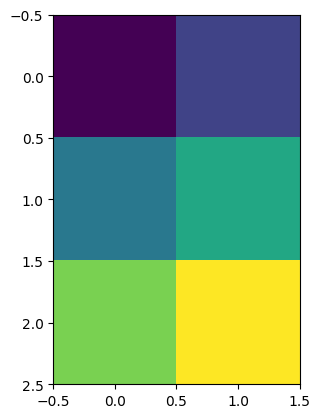

In [42]:
#  引入模块后的 as xxx 可以省略，相当于将引入的模块赋值到的变量xxx上
import matplotlib.pyplot as plt # 等同于 from matplotlib import pyplot as plt
import numpy as np

a = np.zeros([3,2])
step = 0

for i in range(len(a)):
    for j in range(len(a[i])):
        a[i][j] = step
        # python只能+=自增，无法使用++代替
        step += 1
plt.figure()
plt.imshow(a, interpolation="nearest")
plt.show()

## 操作文件
### 读写文件

```python
file = open('example.txt', 'r')
content = file.read()
file.close()
```
等同于
```python
with open('example.txt', 'r') as file:
    content = file.read()
```
推荐使用 `with` 语法以防止忘记手动close带来的麻烦

In [43]:
import os

dir = {
    'path': 'example',
    'file': 'example/test.txt'
}
text = 'this is a test'
arr = ['1', '2', '3']

for i in range(len(arr)):
    arr[i] = '\n' + arr[i]


os.makedirs(dir['path'], exist_ok=True) # 递归创建目录，exist_ok=True 表示如果文件夹已存在，则忽略创建操作
with open(dir['file'], 'w+') as file:
    file.write(text)
    file.writelines(arr) # 用于将多个字符串写入文件。它接受一个可迭代对象（例如列表、元组等）作为参数
    file.seek(0)  # 将文件指针重新定位到文件开头
    print('read: ', file.read())
    file.seek(0)
    print('readline: ', file.readline())
    print('readline: ', file.readline())
    print('readline: ', file.readline())
    file.seek(0)
    print('readlines: ', file.readlines())


read:  this is a test
1
2
3
readline:  this is a test

readline:  1

readline:  2

readlines:  ['this is a test\n', '1\n', '2\n', '3']


#### 读写模式

| 模式 | 描述 |
|------|------|
| 'r'  | 读取模式（默认），表示文件只能读取，文件指针位于文件开头 |
| 'w'  | 写入模式，表示文件只能写入，如果文件已存在，会将其覆盖；如果文件不存在，会创建新文件 |
| 'x'  | 独占创建模式，表示只能创建新文件，如果文件已存在则会报错 |
| 'a'  | 追加模式，表示文件只能写入，文件指针位于文件末尾；如果文件不存在，会创建新文件 |
| 'b'  | 二进制模式，将文件以二进制格式进行读写 |
| 't'  | 文本模式，将文件以文本格式进行读写 |
| '+'  | 读写模式，表示文件既可以读取也可以写入 |

使用时可以将这些模式组合，例如 'rb' 表示以二进制模式打开文件并以只读方式操作。

### 删除文件

In [44]:
import shutil

# os.remove(dir['file']) # 删除文件
# os.rmdir('example') 仅能删除空文件夹
shutil.rmtree(dir['path']) # 递归删除文件夹及内部文件